In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def get_data():
    mjo_df = pd.read_pickle('mjo.pickle.xz')
    deg_day_df = pd.read_pickle('deg_days5.pickle.xz')
    df = mjo_df.join(deg_day_df, how='inner')

    mjo_mask = df.columns.isin(['RMM1', 'RMM2'])
    dd_mask = df.columns.isin(['cdd_anom', 'hdd_anom'])

    # MJO is available two days prior
    cols_to_shift = df.columns[mjo_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(2)

    # Forecast is for 16-20 day period, so 17 days after today is center.
    cols_to_shift = df.columns[dd_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(-17)

    return df

In [13]:
def criteria_filter(c, r):
    res = np.sqrt((c['RMM1'] - r[0])**2 + (c['RMM2'] - r[1])**2) < .5

    return res

In [14]:
def find_analogs(df, today, rmm):
    # Look for analogs within 45 days of today's date
    # between the years indicated
    first_year = 1981
    last_year = 2018
    tdelt = pd.to_timedelta(45, 'D')

    periods = []
    for y in range(first_year, last_year+1):
        try:
            mid = pd.Timestamp(year=y, month=today.month, day=today.day)
        except ValueError:  # Leap day!
            mid = pd.Timestamp(year=y, month=3, day=1)
        prd = pd.period_range(mid - tdelt, mid + tdelt)
        for p in prd:
            periods.append(p.to_timestamp())
    periods = pd.to_datetime(periods)
    candidates = df.loc[periods]

    criteria = criteria_filter(candidates, rmm)
    analogs = candidates[criteria]

    return(analogs)

In [15]:
# Input data
today = pd.Timestamp('2019-7-22')
cur_rmm1 = -1.2411472
cur_rmm2 = -0.88222831

In [16]:
df = get_data()

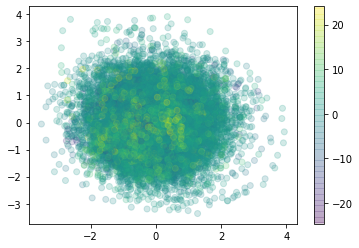

In [17]:
plt.scatter(df['RMM1'], df['RMM2'], c=df['cdd_anom'], alpha=0.2)
plt.colorbar()

In [18]:
analogs = find_analogs(df, today, (cur_rmm1, cur_rmm2))
print(analogs['cdd_anom'].describe())

count    273.000000
mean       2.179377
std        7.923399
min      -19.890000
25%       -2.920000
50%        2.840000
75%        8.300000
max       18.510000
Name: cdd_anom, dtype: float64


In [19]:
analogs

,RMM1,RMM2,cdd_anom,hdd_anom
1981-08-25,-0.799210,-0.818070,1.15,-3.740000e+00
1981-08-26,-0.868230,-0.766090,5.39,-5.990000e+00
1981-08-27,-1.021210,-0.695790,6.97,-6.270000e+00
1981-08-28,-1.254080,-0.500150,4.69,-2.760000e+00
1981-08-29,-1.321170,-0.541010,0.27,2.270000e+00
1981-08-30,-1.294030,-0.690660,-4.60,7.450000e+00
1981-08-31,-1.461820,-0.759100,-9.63,1.048000e+01
1981-09-01,-1.335360,-0.936730,-12.22,1.200000e+01
1981-09-02,-1.116500,-1.251280,-12.28,1.063000e+01
1983-09-04,-1.009260,-1.113310,-0.89,1.627000e+01


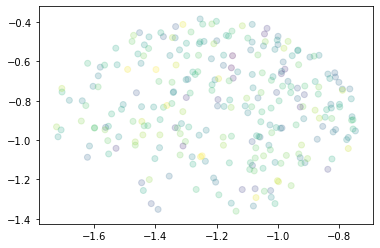

In [20]:
plt.scatter(analogs['RMM1'], analogs['RMM2'], c=analogs['cdd_anom'], alpha=0.2)